Name: **Jorge García Gámiz**

Subject: Machine Learning

Date: 11/12/2024

# Part II: kNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset `water.csv`

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water.csv to water.csv


In [ ]:
data = pd.read_csv('/content/water.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,7.424764,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,3.716080,129.422921,18630.057858,6.635246,332.759842,592.885359,15.180013,56.329076,4.500656,0
3,8.099124,224.236259,19909.541732,9.275884,318.740022,418.606213,16.868637,66.420093,3.055934,0
4,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
5,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3272,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,7.808856,193.553212,17329.802160,8.061362,340.356991,392.449580,19.903225,65.094659,2.798243,1
3274,9.419510,175.762646,33155.578218,7.350233,323.933136,432.044783,11.039070,69.845400,3.298875,1
3275,5.126763,230.603758,11983.869376,6.303357,341.411948,402.883113,11.168946,77.488213,4.708658,1


## Exercise 1

Build and evaluate a kNN classifier. Enter the value of ACC into the answer.

In [ ]:
data.Potability.value_counts(normalize=True)

,proportion
Potability,
0,0.60989
1,0.39011


Let's separate the features

In [ ]:
X = data.drop(columns=['Potability'])
y = data['Potability']

We define the train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Now, we have to standarize our data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)  # k=20 (for example)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.681586978636826

## Exercise 2

Find the optimal value for the number of neighbours. Enter the obtained value into the answer.

In [ ]:
error1= []
error2= []

for k in range(1,21,2):
  knn=KNeighborsClassifier(k)
  knn.fit(X_train,y_train) # the model is trained on the training set
  y_pred1=knn.predict(X_train)
  error1.append(np.mean(y_train!=y_pred1)) # error rate is calculated as the mean of misclassified examples
  y_pred2=knn.predict(X_test)
  error2.append(np.mean(y_test!=y_pred2))

We should look for the $k$ where the test error (`error2`) is minimized.

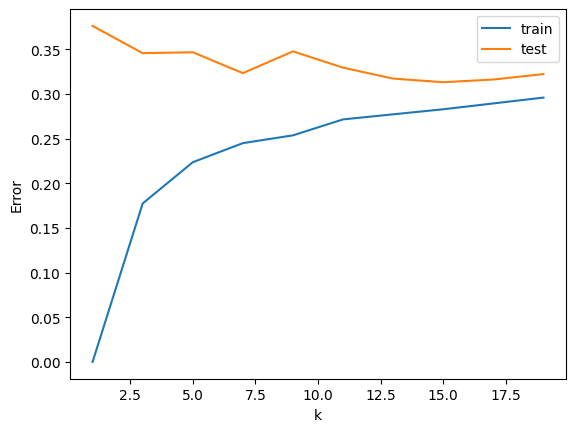

In [ ]:
plt.plot(range(1,21,2), error1, label="train")
plt.plot(range(1,21,2), error2, label="test") # these are more important
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()

In [ ]:
accuracy_rate = []

for k in range(1,20) :
  c1=KNeighborsClassifier(k)
  c1.fit(X_train,y_train)
  y_pr=c1.predict(X_test)
  score=accuracy_score(y_test,y_pr)
  accuracy_rate.append(score)

We should look for the value of $k$ where accuracy is highest on the test set.

Text(0, 0.5, 'Accuracy')

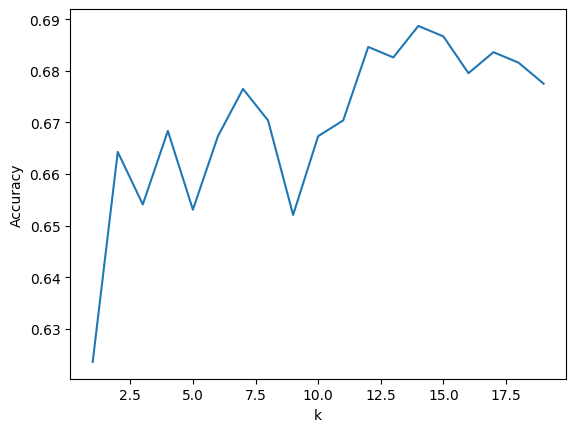

In [ ]:
plt.plot(range(1,20), accuracy_rate, label="test")
plt.xlabel('k')
plt.ylabel('Accuracy')

We conclude that the best value is $k=14$ (`n_clusters=14`)

## Exercise 3

Generate an image of the confusion matrix for the optimal number of neighbours.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=14)  # k=14
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) # to see the TP, TN, FP, FN

[[568  49]
 [257 109]]


<Axes: >

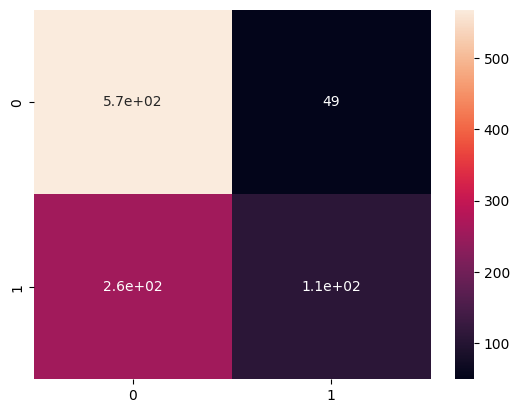

In [ ]:
sns.heatmap(cm, annot=True)

## Exercise 4

For the parameters ph=3.2, Hardness=100, Solids=1800, Chloramines=6, Sulfate=300, Conductivity=450, Organic_carbon=15, Trihalomethanes=60, Turbidity=4 answer whether the water is potable(class 1) or not. Write answer.

In [ ]:
data_to_predict = [[3.2, 100, 1800, 6, 300, 450, 15, 60, 4]]
prediction = classifier.predict(data_to_predict)  # this is the prediction
print(f"The prediction is {prediction[0]}")

The prediction is 1


So we conclude that the water is, in fact, potable